# Анализ таблицы transfer

## Импорт библиотек и подключение к БД

In [3]:
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

In [4]:
conn = psycopg2.connect(
    dbname="...", user="...", password="...", host="...", port=...
)
cursor = conn.cursor()

Скопируем таблицу в DataFrame.

In [7]:
sql_query = pd.read_sql_query(
    """
    SELECT *
    FROM fest.transfer
    """,
    conn,
)
data = pd.DataFrame(sql_query, columns=["train", "route_train", "capacity"])
data.head()

/tmp/ipykernel_971139/1469944231.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_query = pd.read_sql_query(


,train,route_train,capacity
0,100,Vladivostok,129
1,101,Samara,45
2,102,Vladivostok,126
3,103,Vladivostok,119
4,104,Sochi,183


In [66]:
cursor.close()
conn.close()

## Анализ графиков

Построим на некоторые статистики вместимости поездов в зависимости от направления.

In [35]:
capacity_sum = (
    data[["route_train", "capacity"]].groupby(by=["route_train"]).sum()
)
capacity_mean = (
    data[["route_train", "capacity"]].groupby(by=["route_train"]).mean()
)

Text(0.5, 0, 'Направление')

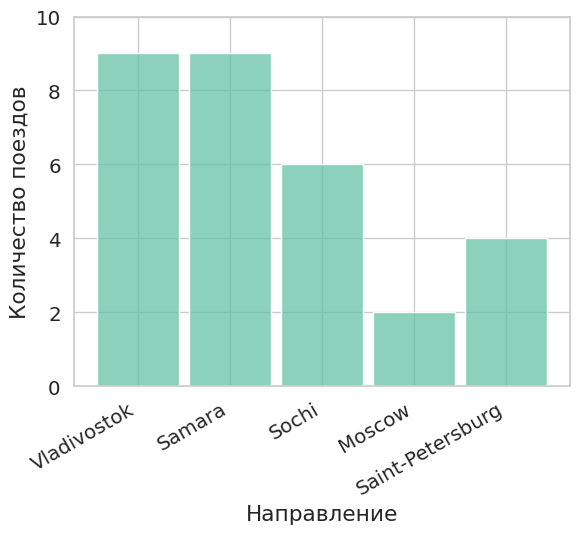

In [65]:
sns.histplot(data=data, x="route_train", shrink=0.9)
plt.xticks(rotation=30, ha="right")
plt.ylim((0, 10))
plt.ylabel("Количество поездов")
plt.xlabel("Направление")

Text(0.5, 0, 'Направление')

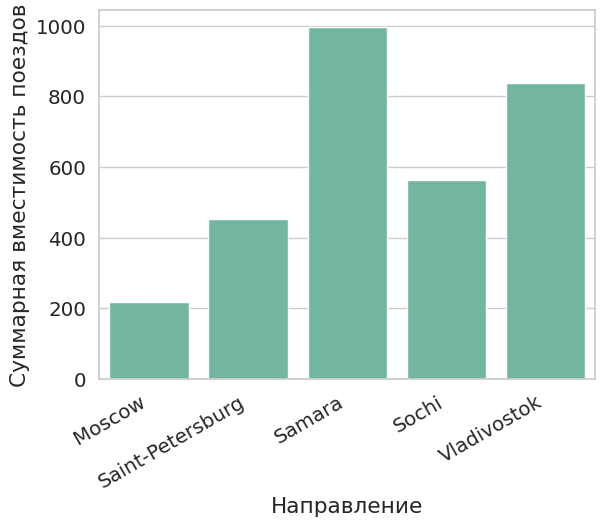

In [63]:
sns.barplot(data=capacity_sum, x="route_train", y="capacity")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Суммарная вместимость поездов")
plt.xlabel("Направление")

Text(0.5, 0, 'Направление')

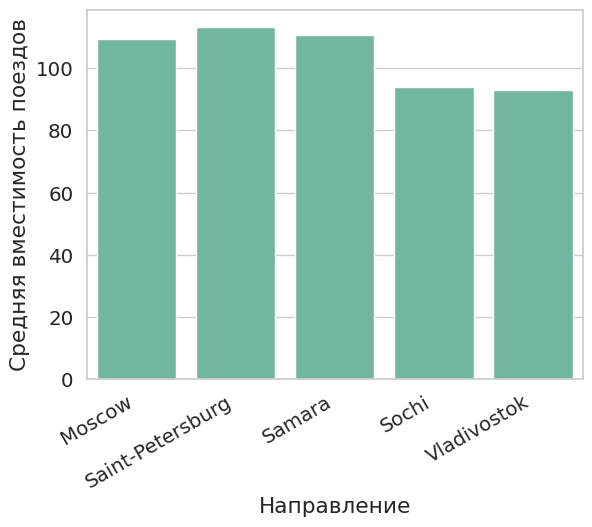

In [64]:
sns.barplot(data=capacity_mean, x="route_train", y="capacity")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Средняя вместимость поездов")
plt.xlabel("Направление")

**Вывод:** из исследования можно сделать вывод, что поездов больше на дальних направлениях: Самара, Владивосток и Сочи. Закономерно, суммарная вместимость будет больше именно на этих маршрутах. Однако вместимость отдельно взятого поезда будет больше в Москве. Самая большая средняя вместимость у поездов из Санкт-Петербурга.